In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

## 1. Первичный анализ

In [32]:
adult_df = pd.read_csv('./Data/adult.csv')

In [33]:
adult_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### 1.1 Информация по набору данных

In [34]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


> Я брал датасет из интернета, а не по ссылке которая представленна в задание, потому что не открывается)

> Если бы были пропуски их можно было бы удалить adult_df[~pd.isna(adult_df)], или заполнить(модой, средним, медианой)

### 1.2 Основные статистики

In [35]:
adult_df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### 1.3 Тепловая карта корреляции признаков 

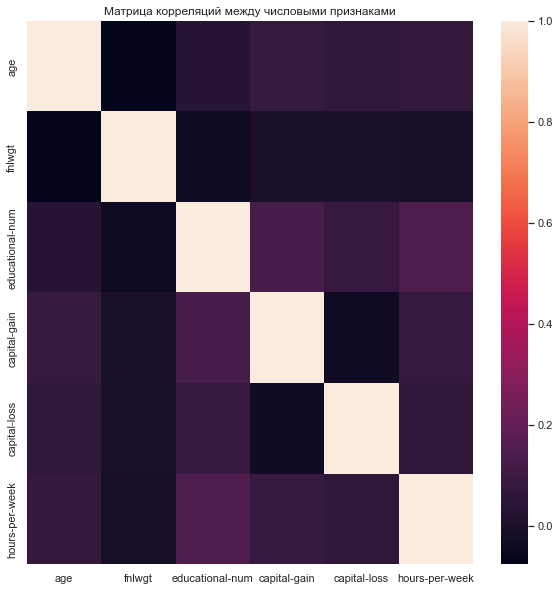

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(
    adult_df.corr()
)
plt.title('Матрица корреляций между числовыми признаками')
plt.show()

> Мы видим что взаимосвязи между признаками особо сильной нет.

### 1.4 Распределение числовых признаков

In [52]:
def show_hist_features(df):
    for features in df.describe().columns:
        plt.hist(df[features])
        plt.title(f'Распределение {features}')
        plt.show()

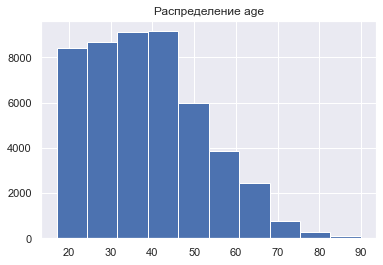

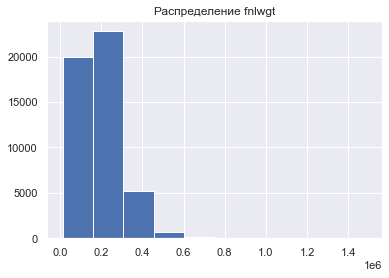

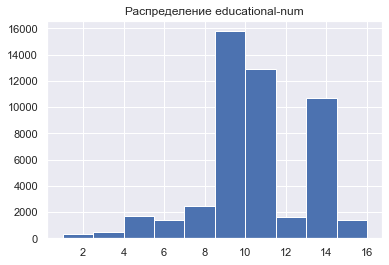

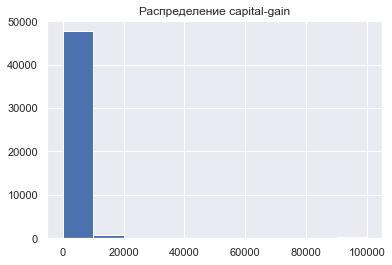

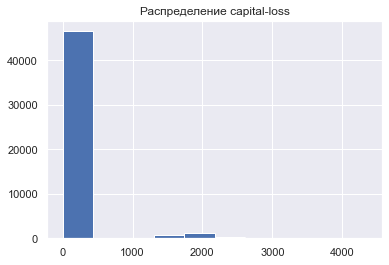

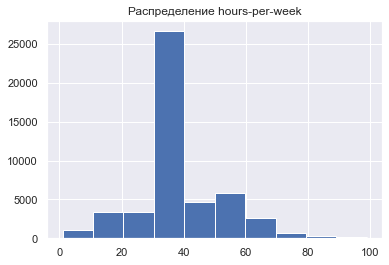

In [54]:
show_hist_features(adult_df)

> Делаем вывод, что все числовые признаки расспределены не нормально.

### 1.5 Столбчатый график рабочик классов

In [152]:
workclass_groupby_hours = adult_df.groupby('workclass').agg({'hours-per-week': 'sum'}).reset_index()

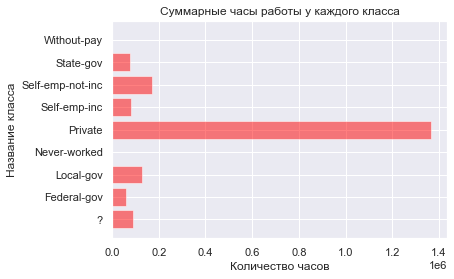

In [167]:
plt.barh(
    workclass_groupby_hours['workclass'], 
    workclass_groupby_hours['hours-per-week'], 
    color='red', 
    alpha=0.5
)
plt.title('Суммарные часы работы у каждого класса')
plt.xlabel('Количество часов')
plt.ylabel('Название класса')
plt.show()

> Из этого графика мы можем сделать вывод, что больше всех работает рабочик класс Private

## 2 Обработка данных

In [56]:
adult_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### 2.1 Преобразование категориальных данных в числовой вид.

In [82]:
category_columns = [
    'workclass', 
    'education', 
    'marital-status', 
    'occupation', 
    'relationship', 
    'race', 
    'gender', 
    'native-country'
]

adult_df_encoded = pd.get_dummies(adult_df, columns=category_columns)

In [83]:
label_encoder = LabelEncoder()
label_encoder.fit(adult_df_encoded['income'])
adult_df_encoded['income_encoded'] = label_encoder.transform(adult_df['income'])

### 2.2 Разделение данных на train / test

In [85]:
X = adult_df_encoded.drop(['income', 'income_encoded'], axis=1)
y = adult_df_encoded.drop('income', axis=1)['income_encoded']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3 Обучение модели (LogisticRegression)

### 3.1 Обучение

In [89]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

### 3.2 Предсказание

In [98]:
y_true = np.array(y_test)
y_pred = log_reg.predict(X_test)

### 3.3 Оценка качества 

In [102]:
log_reg.score(X_test, y_test) # Для тестовой выборки

0.8036646534957519

## 4 Обучение модели (SMV)

### 4.1 Обучение 

In [103]:
smv = SVC()
smv.fit(X_train, y_train)

SVC()

### 4.2 Предсказание

In [105]:
y_true = np.array(y_test)
y_pred = smv.predict(X_test)

### 4.3 Оценка качества

In [106]:
smv.score(X_test, y_test)

0.8033575596273927

## Вывод по работе

* Преобразование данных - в данной работе я закодировал категориальные признаки с помощью OneHot кодировки, кроме столбца income, чтобы было удобно выделить предсказываемую переменную(ее я закодировал LabelEncoder)


* Сравнение двух моделей - точность предсказаний у двух моделей одинакова, но SMV обучался намного дольше чем логистическая регрессия 


* В данной работе я бы хотел улучшить точность предсказаний